In [1]:
#imports 
import os
import math 
import json 
import random
from dotenv import load_dotenv
!git config --global credential.helper store

!pip install transformers
from huggingface_hub import login
from items import Item 
import matplotlib.pyplot as plt
import pickle
import numpy as np 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


/usr/local/lib/python3.12/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [3]:
#login to hugging face

load_dotenv("hg_token")
huggingface_token = os.getenv("HUGGINGFACE_TOKEN")
login(huggingface_token, add_to_git_credential=True)

In [4]:
#more imports for our traditional machine leaening models

import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [5]:
# and more imports for our NLP related machine learning
from sklearn.feature_extraction.text import CountVectorizer
!pip install gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 129.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 150.5 MB/s eta 0:00:0000:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [6]:
#more imports for more advanced machine learning 
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#constants used for printing stdout in color
# GREEN= "\033[92m"
# YELLOW = "\033[93m"
# RED = "\033[91m"
# RESET ="\033[0m"
# COLOR_MAP = {"red":"RED", "yellow":"YELLOW", "green":"GREEN"}

In [7]:
# Constants - used for printing to stdout in color

GREEN = "\033[92m"
YELLOW = "\033[93m"
RED = "\033[91m"
RESET = "\033[0m"
COLOR_MAP = {"red":RED, "orange": YELLOW, "green": GREEN}

In [8]:
# lets avoid curating our data again! load in pickle files
with open("train.pkl", "rb") as file:
    train = pickle.load(file)



with open("test.pkl", "rb") as file:
    test = pickle.load(file)

In [9]:
#remind ourselves the train prompt
print(train[0].prompt)

How much does this cost to the nearest dollar?

Super-Softie Kit 416, Super-Softie and Lyre Mount Kit for Sennheiser MKH 416 Sennheiser ME66 K6, Rode NTG3 and Sanken CS-3e
Aerodynamic and durable, the Super-Softie Kit 416 slip-on microphone windshield and shock mounting system provides superior performance and unparalleled durability for your Sennheiser MKH 416, also Sennheiser ME66 K6, Rode NTG3 and Sanken CS-3e. Kit includes Super-Softie Windshield and Universal Shotgun Mount ideal for boom pole use or on-camera with included brass cold-shoe adaptor. Perfect for the Sennheiser MKH 416, also Sennheiser ME66 K6,

Price is $205.00


In [10]:
#remind the test prompt
print(test[0].test_prompt)

<bound method Item.test_prompt of <AC Compressor & A/C Clutch For Chevy Sonic 1.8L Non-Turbo 2013 2014 2015 2016 2017 2018 - BuyAutoParts 60-03818NA New = $250.41>>


In [11]:
print(train[0].price)

205.0


## Unveiling a mighty script that we will use alot

In [12]:
class Tester:

    def __init__(self, predictor, title=None, data=test, size=250):
        self.predictor = predictor
        self.data = data
        self.title = title or predictor.__name__.replace("_", " ").title()
        self.size = size
        self.guesses = []
        self.truths = []
        self.errors = []
        self.sles = []
        self.colors = []

    def color_for(self, error, truth):
        if error<40 or error/truth < 0.2:
            return "green"
        elif error<80 or error/truth < 0.4:
            return "orange"
        else:
            return "red"
    
    def run_datapoint(self, i):
        datapoint = self.data[i]
        guess = self.predictor(datapoint)
        truth = datapoint.price
        error = abs(guess - truth)
        log_error = math.log(truth+1) - math.log(guess+1)
        sle = log_error ** 2
        color = self.color_for(error, truth)
        title = datapoint.title if len(datapoint.title) <= 40 else datapoint.title[:40]+"..."
        self.guesses.append(guess)
        self.truths.append(truth)
        self.errors.append(error)
        self.sles.append(sle)
        self.colors.append(color)
        print(f"{COLOR_MAP[color]}{i+1}: Guess: ${guess:,.2f} Truth: ${truth:,.2f} Error: ${error:,.2f} SLE: {sle:,.2f} Item: {title}{RESET}")

    def chart(self, title):
        max_error = max(self.errors)
        plt.figure(figsize=(12, 8))
        max_val = max(max(self.truths), max(self.guesses))
        plt.plot([0, max_val], [0, max_val], color='deepskyblue', lw=2, alpha=0.6)
        plt.scatter(self.truths, self.guesses, s=3, c=self.colors)
        plt.xlabel('Ground Truth')
        plt.ylabel('Model Estimate')
        plt.xlim(0, max_val)
        plt.ylim(0, max_val)
        plt.title(title)
        plt.show()

    def report(self):
        average_error = sum(self.errors) / self.size
        rmsle = math.sqrt(sum(self.sles) / self.size)
        hits = sum(1 for color in self.colors if color=="green")
        title = f"{self.title} Error=${average_error:,.2f} RMSLE={rmsle:,.2f} Hits={hits/self.size*100:.1f}%"
        self.chart(title)

    def run(self):
        self.error = 0
        for i in range(self.size):
            self.run_datapoint(i)
        self.report()

    @classmethod
    def test(cls, function):
        cls(function).run()

In [13]:
#lets have a trival model
training_prices = [item.price for item in train]
training_average = sum(training_prices)/ len(training_prices)

def constant_pricer(item):
    return training_average

1: Guess: $220.58 Truth: $250.41 Error: $29.83 SLE: 0.02 Item: AC Compressor & A/C Clutch For Chevy Son...
2: Guess: $220.58 Truth: $118.50 Error: $102.08 SLE: 0.38 Item: MCR Safety BPCL3LX3 Luminator Class 3 In...
3: Guess: $220.58 Truth: $263.21 Error: $42.63 SLE: 0.03 Item: CABOT SAMUEL 19205-08 INC 5GAL Pac RED D...
4: Guess: $220.58 Truth: $93.88 Error: $126.70 SLE: 0.72 Item: Carrying Case With Kickstand - CTA Secur...
5: Guess: $220.58 Truth: $222.35 Error: $1.77 SLE: 0.00 Item: Fill-Rite 807CN1 1" 5-20 GPM 3 Wheel Mec...
6: Guess: $220.58 Truth: $97.54 Error: $123.04 SLE: 0.66 Item: Evniset Kitchen Faucets Lead-Free Commer...
7: Guess: $220.58 Truth: $375.75 Error: $155.17 SLE: 0.28 Item: Kingston FURY Renegade RGB 128GB (4x32GB...
8: Guess: $220.58 Truth: $108.57 Error: $112.01 SLE: 0.50 Item: Elk 10150/1DR-WS Celina 1-Light Dark Rus...
9: Guess: $220.58 Truth: $84.99 Error: $135.59 SLE: 0.90 Item: DEWALT DWA4203B Bi Metal Wood with Nails...
10: Guess: $220.58 Truth: $34.99 Er

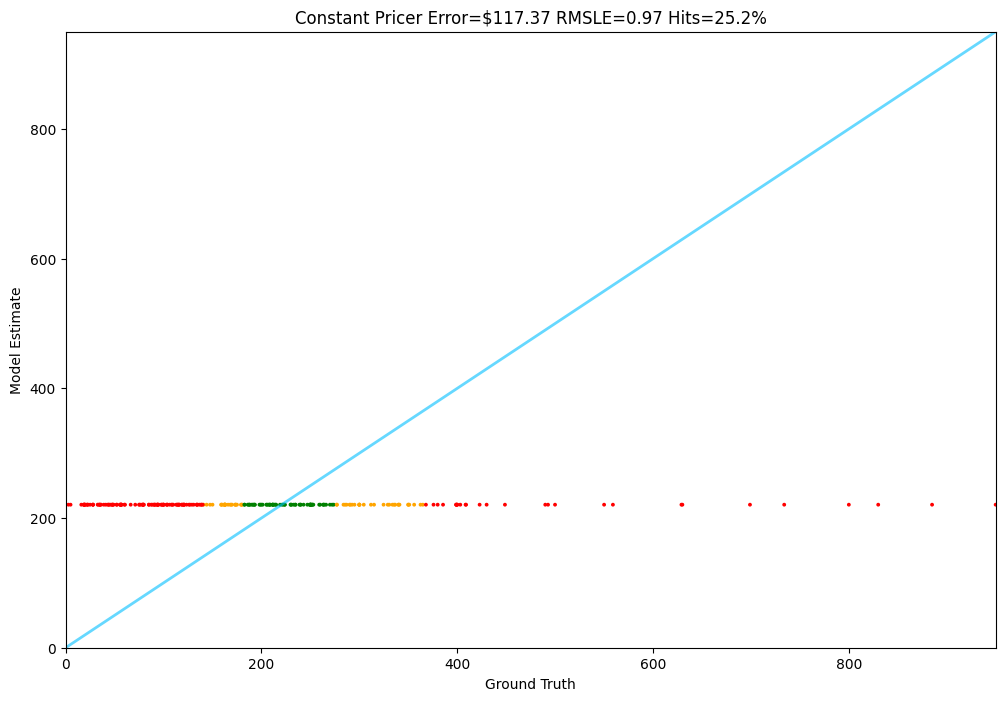

In [14]:
Tester.test(constant_pricer)

In [15]:
#create a new "feature" items, and populate it json parsed from the details dict
for item in train:
    item.features = json.loads(item.details)
for item in test:
    item.features = json.loads(item.details)

In [16]:
train[0].details

'{"Item Weight": "0.19 Kilograms", "Product Dimensions": "9.06 x 3.94 x 3.94 inches", "Item model number": "033207", "Batteries": "AAA batteries required.", "Best Sellers Rank": {"Musical Instruments": 182544, "Microphone Windscreens": 922}, "Is Discontinued By Manufacturer": "No", "Date First Available": "April 15, 2016", "Compatible Devices": "Camera", "Material Type": "Brass", "Hardware Platform": "Camera", "Power Source": "Corded Electric", "Brand": "Rycote", "Model Name": "Super-Softie Kit 416, Super-Softie And Universal Shotgun Mount Kit for Sennheiser MKH 416", "Included Components": "Microphone", "Polar Pattern": "Unidirectional", "Microphone Form Factor": "Shotgun", "Item Dimensions LxWxH": "9.06 x 3.94 x 3.94 inches", "Number of Batteries": "AAA batteries required."}'

In [17]:
print(type(train[0].details))

<class 'str'>


In [18]:
train[0].features

{'Item Weight': '0.19 Kilograms',
 'Product Dimensions': '9.06 x 3.94 x 3.94 inches',
 'Item model number': '033207',
 'Batteries': 'AAA batteries required.',
 'Best Sellers Rank': {'Musical Instruments': 182544,
  'Microphone Windscreens': 922},
 'Is Discontinued By Manufacturer': 'No',
 'Date First Available': 'April 15, 2016',
 'Compatible Devices': 'Camera',
 'Material Type': 'Brass',
 'Hardware Platform': 'Camera',
 'Power Source': 'Corded Electric',
 'Brand': 'Rycote',
 'Model Name': 'Super-Softie Kit 416, Super-Softie And Universal Shotgun Mount Kit for Sennheiser MKH 416',
 'Included Components': 'Microphone',
 'Polar Pattern': 'Unidirectional',
 'Microphone Form Factor': 'Shotgun',
 'Item Dimensions LxWxH': '9.06 x 3.94 x 3.94 inches',
 'Number of Batteries': 'AAA batteries required.'}

In [37]:
print(type(train[0].features))

<class 'dict'>


In [42]:
from collections import Counter
#look at 20 most common features intrainng dataset

most_common_features = Counter()

for item in train:
    for fr in item.features.keys():
        most_common_features[fr]+=1
print(most_common_features.most_common(40))
        

[('Date First Available', 358233), ('Item Weight', 350379), ('Manufacturer', 347475), ('Brand', 336958), ('Best Sellers Rank', 329813), ('Item model number', 280004), ('Product Dimensions', 265034), ('Color', 188460), ('Is Discontinued By Manufacturer', 172390), ('Material', 140321), ('Manufacturer Part Number', 130749), ('Country of Origin', 120894), ('Style', 80606), ('Part Number', 79956), ('Batteries Required?', 78883), ('Special Feature', 76876), ('Package Dimensions', 72134), ('Included Components', 71388), ('Item Dimensions LxWxH', 71284), ('Item Package Quantity', 62388), ('Batteries Included?', 61053), ('Size', 60612), ('Model', 58148), ('Power Source', 53501), ('Special Features', 53058), ('OEM Part Number', 49241), ('Finish Type', 48809), ('Voltage', 47786), ('Exterior', 44956), ('Vehicle Service Type', 43903), ('Mounting Type', 40056), ('Model Name', 39084), ('Shape', 36857), ('Finish', 34058), ('Number of Items', 33812), ('Connectivity Technology', 32973), ('Compatible Dev

In [58]:
#investigate the brands

brands_count = Counter()
for item in train:
    brand = item.features.get("Brand")
    brands_count[brand] +=1
# print(brands_count)
brands_count.most_common(40)

[(None, 63042),
 ('HP', 5699),
 ('Dell', 3514),
 ('Power Stop', 3369),
 ('Lenovo', 2540),
 ('Detroit Axle', 2293),
 ('SAMSUNG', 1905),
 ('Dorman', 1815),
 ('BUYAUTOPARTS!', 1616),
 ('ASUS', 1432),
 ('Sony', 1347),
 ('ACDelco', 1302),
 ('Canon', 1248),
 ('Kohler', 1210),
 ('Evan Fischer', 1195),
 ('Callahan BRAKE PARTS', 1019),
 ('R1 Concepts', 1006),
 ('CURT', 997),
 ('Kingston Brass', 966),
 ('Moen', 911),
 ('DELTA FAUCET', 854),
 ('Apple', 831),
 ('Coverking', 815),
 ('Generic', 807),
 ('Rareelectrical', 777),
 ('Garage-Pro', 770),
 ('K&N', 735),
 ('Spectra Premium', 703),
 ('APS', 682),
 ('WeatherTech', 680),
 ('DEWALT', 670),
 ('GM', 670),
 ('Walker', 657),
 ('Intel', 656),
 ('Auto Dynasty', 647),
 ('Cardone', 642),
 ('Kichler', 622),
 ('Panasonic', 620),
 ('Magic The Gathering', 618),
 ('Westin', 597)]

In [46]:
TOP_ELECTRONICS_BRAND= ["hp","lenovo" , "samsung", "asus","sony" ,"canon" ,"apple" , "intel", "dell"]

def is_top_electronics_brand(item):
    print(item)
    print(item.features)
    brand = item.features.get("Brand")
    print(brand)
    
    return brand and brand.lower() in TOP_ELECTRONICS_BRAND

is_top_electronics_brand(item)

<ACDelco 23269945 GM Original Equipment Front Driver Side Power Window Regulator and Motor Assembly = $88.67>
{'Manufacturer': 'ACDelco', 'Brand': 'ACDelco', 'Item Weight': '2.45 pounds', 'Product Dimensions': '25.2 x 14.4 x 5.4 inches', 'Country of Origin': 'Mexico', 'Item model number': '23269945', 'Manufacturer Part Number': '42671713', 'OEM Part Number': '23269945', 'Special Features': 'Easy to Install', 'Best Sellers Rank': {'Automotive': 379066, 'Automotive Replacement Window Regulator & Motor Assemblies': 908}, 'Date First Available': 'April 12, 2016'}
ACDelco


False

In [47]:
def get_weight(item):
    weight_str = item.features.get('Item Weight')
    if weight_str:
        parts = weight_str.split(' ')
        amount = float(parts[0])
        unit = parts[1].lower()
        if unit=="pounds":
            return amount
        elif unit=="ounces":
            return amount / 16
        elif unit=="grams":
            return amount / 453.592
        elif unit=="milligrams":
            return amount / 453592
        elif unit=="kilograms":
            return amount / 0.453592
        elif unit=="hundredths" and parts[2].lower()=="pounds":
            return amount / 100
        else:
            print(weight_str)
    return None

In [48]:
weights = [get_weight(t) for t in train]
weights = [w for w in weights if w]

In [49]:
average_weight = sum(weights)/len(weights)
average_weight

13.454008911487357

In [50]:
def get_weight_with_default(item):
    weight = get_weight(item)
    return weight or average_weight

In [51]:
def get_rank(item):
    rank_dict = item.features.get("Best Sellers Rank")
    if rank_dict:
        ranks = rank_dict.values()
        return sum(ranks)/len(ranks)
    return None


In [52]:
ranks = [get_rank(t) for t in train]
ranks = [r for r in ranks if r]
average_rank = sum(ranks)/len(ranks)
average_rank

360719.3606129756

In [53]:
def get_rank_with_default(item):
    rank = get_rank(item)
    return rank or average_rank

In [26]:
def get_text_length(item):
    return len(item.test_prompt())

In [54]:
# investigate the brands
from collections import Counter
brands = Counter()
for t in train:
    brand = t.features.get("Brand")
    if brand:
        brands[brand]+=1

# Look at most common 40 brands

brands.most_common(40)

[('HP', 5699),
 ('Dell', 3514),
 ('Power Stop', 3369),
 ('Lenovo', 2540),
 ('Detroit Axle', 2293),
 ('SAMSUNG', 1905),
 ('Dorman', 1815),
 ('BUYAUTOPARTS!', 1616),
 ('ASUS', 1432),
 ('Sony', 1347),
 ('ACDelco', 1302),
 ('Canon', 1248),
 ('Kohler', 1210),
 ('Evan Fischer', 1195),
 ('Callahan BRAKE PARTS', 1019),
 ('R1 Concepts', 1006),
 ('CURT', 997),
 ('Kingston Brass', 966),
 ('Moen', 911),
 ('DELTA FAUCET', 854),
 ('Apple', 831),
 ('Coverking', 815),
 ('Generic', 807),
 ('Rareelectrical', 777),
 ('Garage-Pro', 770),
 ('K&N', 735),
 ('Spectra Premium', 703),
 ('APS', 682),
 ('WeatherTech', 680),
 ('DEWALT', 670),
 ('GM', 670),
 ('Walker', 657),
 ('Intel', 656),
 ('Auto Dynasty', 647),
 ('Cardone', 642),
 ('Kichler', 622),
 ('Panasonic', 620),
 ('Magic The Gathering', 618),
 ('Westin', 597),
 ('Makita', 575)]

In [55]:
TOP_ELECTRONICS_BRANDS = ["hp", "dell", "lenovo", "samsung", "asus", "sony", "canon", "apple", "intel"]
def is_top_electronics_brand(item):
    brand = item.features.get("Brand")
    return brand and brand.lower() in TOP_ELECTRONICS_BRANDS

In [56]:
def get_features(item):
    
    return {
            "weight":get_weight_with_default(item),
            "rank":get_rank_with_default(item),
            "text_length":get_text_length(item),
            "is_top_electronics_brand":1 if is_top_electronics_brand(item) else 0
       
        }

In [57]:
#look at features in a training item
get_features(train[0])

{'weight': 0.41887863983491774,
 'rank': 91733.0,
 'text_length': 631,
 'is_top_electronics_brand': 0}

In [58]:
# A utility function to convert our features to pandas dataframe

def list_to_dataframe(items):
    features = [get_features(item) for item in items]
    df = pd.DataFrame(features)
    df['price'] = [item.price for item in items]
    return df

    

train_df = list_to_dataframe(train)
test_df = list_to_dataframe(test[:250])
    

In [112]:
#traditional linear regression
np.random.seed(42)

#separate features and target
feature_columns = [col for col in train_df.columns if col!= "price"]
print(feature_columns)
X_train = train_df[feature_columns]
y_train = train_df["price"] 

X_test = test_df[feature_columns]
y_test = test_df["price"]


#train a linear regression 
model = LinearRegression()
model.fit(X_train, y_train)

for feature, coef in zip(feature_columns, model.coef_):
    
    print(f"{feature}:{coef}")
print(f"intercept :{model.intercept_}")

#predict the test set and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error:{mse}")
print(f"R-squared error:{r2}")


['weight', 'rank', 'text_length', 'is_top_electronics_brand']
weight:0.24201797188452417
rank:6.224347529891971e-05
text_length:0.005312297145426124
is_top_electronics_brand:187.7840891018264
intercept :181.7647909495328
Mean Squared Error:22944.235964298634
R-squared error:0.06152585113640785


In [80]:
#function to predict a price for a new item
def linear_regression_pricer(item):
    features = get_features(item)
    features_df = pd.DataFrame([features])
    return model.predict(features_df)[0]

1: Guess: $201.69 Truth: $250.41 Error: $48.72 SLE: 0.05 Item: AC Compressor & A/C Clutch For Chevy Son...
2: Guess: $208.57 Truth: $118.50 Error: $90.07 SLE: 0.32 Item: MCR Safety BPCL3LX3 Luminator Class 3 In...
3: Guess: $250.82 Truth: $263.21 Error: $12.39 SLE: 0.00 Item: CABOT SAMUEL 19205-08 INC 5GAL Pac RED D...
4: Guess: $192.22 Truth: $93.88 Error: $98.34 SLE: 0.51 Item: Carrying Case With Kickstand - CTA Secur...
5: Guess: $211.08 Truth: $222.35 Error: $11.27 SLE: 0.00 Item: Fill-Rite 807CN1 1" 5-20 GPM 3 Wheel Mec...
6: Guess: $250.32 Truth: $97.54 Error: $152.78 SLE: 0.88 Item: Evniset Kitchen Faucets Lead-Free Commer...
7: Guess: $186.44 Truth: $375.75 Error: $189.31 SLE: 0.49 Item: Kingston FURY Renegade RGB 128GB (4x32GB...
8: Guess: $208.40 Truth: $108.57 Error: $99.83 SLE: 0.42 Item: Elk 10150/1DR-WS Celina 1-Light Dark Rus...
9: Guess: $201.04 Truth: $84.99 Error: $116.05 SLE: 0.73 Item: DEWALT DWA4203B Bi Metal Wood with Nails...
10: Guess: $186.84 Truth: $34.99 Erro

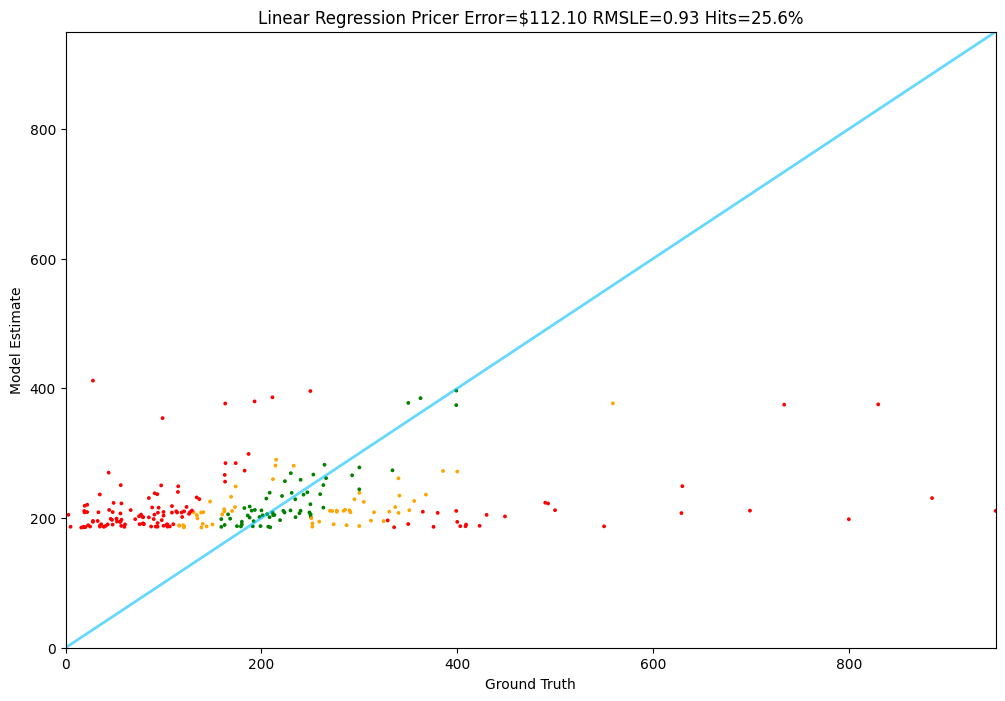

In [116]:
Tester.test(linear_regression_pricer)

In [59]:
# for the next few models we prepare our documents and prices
prices = np.array([float(item.price) for item in train])
documents = [item.test_prompt() for item in train]

In [60]:
#Use a count vercorizer for a bag of words model


np.random.seed(42)
vectorizer = CountVectorizer(max_features=1000, stop_words="english") # turns text into numerical feature vectors
X = vectorizer.fit_transform(documents)# with fit it learns all unique words from the documents(each word gets index) with transform it converts each document into vectors.it counts howmany times each words appears in the document

regressor = LinearRegression()
regressor.fit(X, prices)               # the model learns what word appears, how mant times and what is the final prcie



LinearRegression()

In [65]:
def bow_lr_pricer(item):
    x = vectorizer.transform([item.test_prompt()])
    return max(regressor.predict(x)[0], 0) #if the model made a weird predicton  we want to be sure negative price will not be included
    

1: Guess: $198.33 Truth: $250.41 Error: $52.08 SLE: 0.05 Item: AC Compressor & A/C Clutch For Chevy Son...
2: Guess: $189.49 Truth: $118.50 Error: $70.99 SLE: 0.22 Item: MCR Safety BPCL3LX3 Luminator Class 3 In...
3: Guess: $204.47 Truth: $263.21 Error: $58.74 SLE: 0.06 Item: CABOT SAMUEL 19205-08 INC 5GAL Pac RED D...
4: Guess: $225.24 Truth: $93.88 Error: $131.36 SLE: 0.76 Item: Carrying Case With Kickstand - CTA Secur...
5: Guess: $239.34 Truth: $222.35 Error: $16.99 SLE: 0.01 Item: Fill-Rite 807CN1 1" 5-20 GPM 3 Wheel Mec...
6: Guess: $215.48 Truth: $97.54 Error: $117.94 SLE: 0.62 Item: Evniset Kitchen Faucets Lead-Free Commer...
7: Guess: $337.47 Truth: $375.75 Error: $38.28 SLE: 0.01 Item: Kingston FURY Renegade RGB 128GB (4x32GB...
8: Guess: $177.83 Truth: $108.57 Error: $69.26 SLE: 0.24 Item: Elk 10150/1DR-WS Celina 1-Light Dark Rus...
9: Guess: $38.81 Truth: $84.99 Error: $46.18 SLE: 0.59 Item: DEWALT DWA4203B Bi Metal Wood with Nails...
10: Guess: $0.00 Truth: $34.99 Error: $

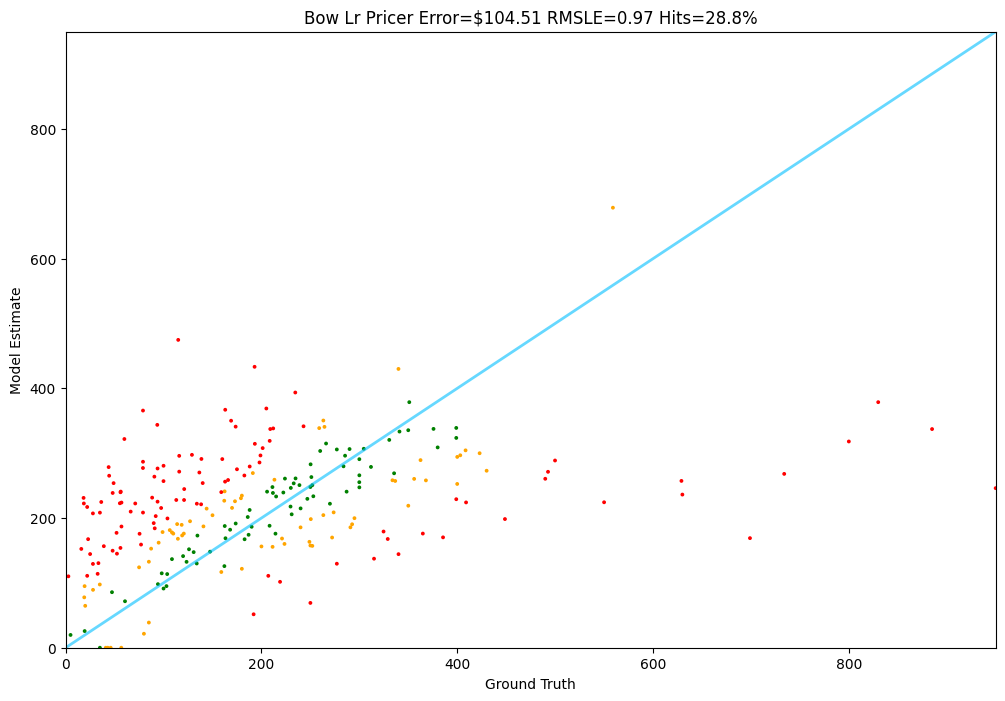

In [66]:
Tester.test(bow_lr_pricer)

In [ ]:
# the amazing word2vec model, implemented in gensim nlp library

In [71]:
#this function lon the whole convert text nto numerical vectors.
#lowercase, removes punctuations, and tokenize into words

processed_doc = [simple_preprocess(doc) for doc in documents]  #preprocess the documents

#train word2 vec model
w2v_model = Word2Vec(sentences=processed_doc, vector_size=400, window=5, min_count=1, workers=8) #word2 vec look at 5 words around the target word to learn context/uses 8 cpus/each word will be presented as a 400 dimentional vector
#define a function to vectorize the 



In [74]:
def document_vector(doc):
    doc_words = simple_preprocess(doc)
    word_vectors = [w2v_model.wv[word] for word in doc_words if word in w2v_model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(w2v_model.vector_size)
#create feature matrix
X_w2v = np.array([document_vector(doc) for doc in documents])

In [75]:
#run linear regression on word2vec

word2vec_lr_regressor = LinearRegression()
word2vec_lr_regressor.fit(X_w2v, prices)

LinearRegression()

In [81]:
def word2vec_lr_pricer(item):
    doc = item.test_prompt()
    doc_vector = document_vector(doc)
    return max(0, word2vec_lr_regressor.predict([doc_vector])[0])
    

1: Guess: $256.59 Truth: $250.41 Error: $6.18 SLE: 0.00 Item: AC Compressor & A/C Clutch For Chevy Son...
2: Guess: $177.61 Truth: $118.50 Error: $59.11 SLE: 0.16 Item: MCR Safety BPCL3LX3 Luminator Class 3 In...
3: Guess: $182.36 Truth: $263.21 Error: $80.85 SLE: 0.13 Item: CABOT SAMUEL 19205-08 INC 5GAL Pac RED D...
4: Guess: $151.20 Truth: $93.88 Error: $57.32 SLE: 0.22 Item: Carrying Case With Kickstand - CTA Secur...
5: Guess: $266.95 Truth: $222.35 Error: $44.60 SLE: 0.03 Item: Fill-Rite 807CN1 1" 5-20 GPM 3 Wheel Mec...
6: Guess: $180.23 Truth: $97.54 Error: $82.69 SLE: 0.37 Item: Evniset Kitchen Faucets Lead-Free Commer...
7: Guess: $304.21 Truth: $375.75 Error: $71.54 SLE: 0.04 Item: Kingston FURY Renegade RGB 128GB (4x32GB...
8: Guess: $225.94 Truth: $108.57 Error: $117.37 SLE: 0.53 Item: Elk 10150/1DR-WS Celina 1-Light Dark Rus...
9: Guess: $53.11 Truth: $84.99 Error: $31.88 SLE: 0.21 Item: DEWALT DWA4203B Bi Metal Wood with Nails...
10: Guess: $55.00 Truth: $34.99 Error: $2

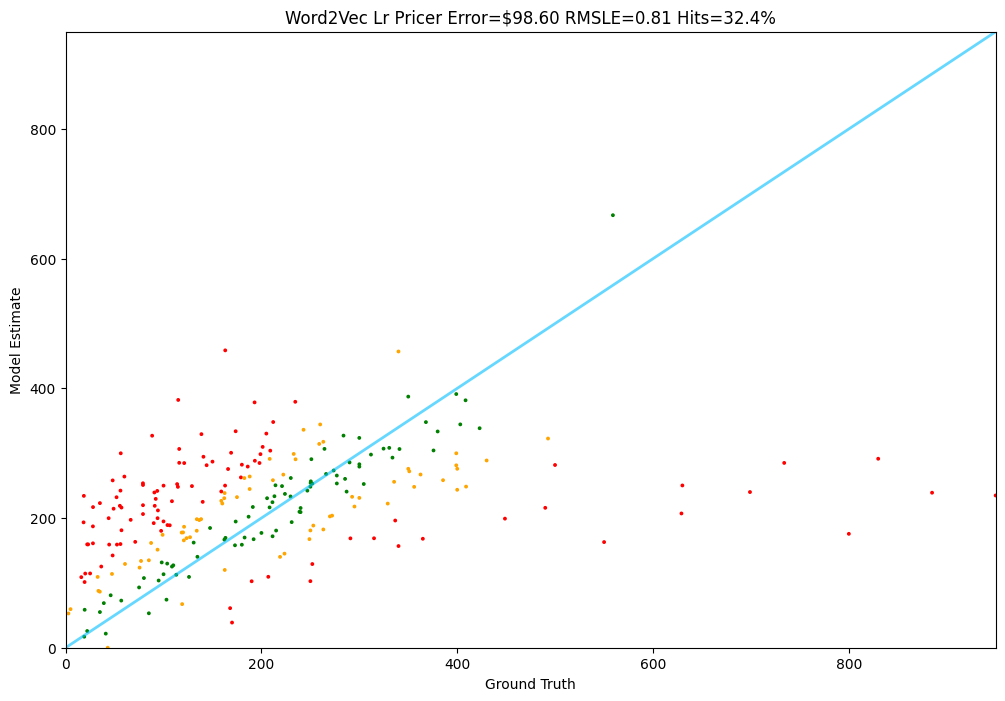

In [82]:
Tester.test(word2vec_lr_pricer)

## Now it is time to predict two other models SVM and RandomForest

In [83]:
np.random.seed(42)
svr_regressor = LinearSVR()
svr_regressor.fit(X_w2v, prices)


LinearSVR()

In [84]:
def svr_pricer(item):
    doc = item.test_prompt()
    doc_vector = document_vector(doc)
    return max(0, float(svr_regressor.predict(doc_vector)[0]))
    

In [ ]:
#and the powerful random forest regressor
np.random.seed(42)
rf_model= RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
rf_model.fit(X_w2v, prices)


In [ ]:
def rf_pricer(item):
    doc = item.test_prompt()
    doc_vector = document_vector(doc)
    return max(0, float(rf_model.predict(doc_vector)[0]))
    

In [ ]:
Tester.test(svr_pricer)

In [ ]:
Tester.test(rf_pricer)